In [ ]:
BIOL 419 Course Final Project
Aadithya Sekar
Muhammad Shabbeer Ghauri

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import Imputer
%matplotlib inline

In [2]:
df = pd.read_excel('Data_Cortex_Nuclear.xls', header=0)

df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


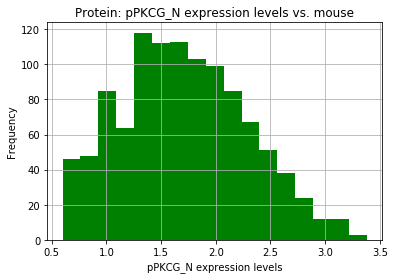

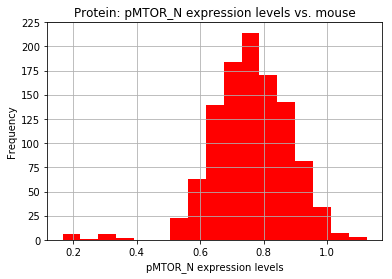

In [3]:
# Image Visualization for March 3rd Interim Report: (Images merely were initial attempts at understanding the variation in the protein expression data.)

df.hist(column='pPKCG_N', bins=17, color='green')
plt.title("Protein: pPKCG_N expression levels vs. mouse")
plt.xlabel("pPKCG_N expression levels")
plt.ylabel("Frequency")

df.hist(column='pMTOR_N', bins=17, color='red')
plt.title("Protein: pMTOR_N expression levels vs. mouse")
plt.xlabel("pMTOR_N expression levels")
plt.ylabel("Frequency")


In [4]:
from sklearn.decomposition import PCA

In [5]:
protein_expression = df.iloc[:, 1:78]
mouse_class = df.iloc[:, 81]
print(protein_expression) 
print(mouse_class)
protein_expression.shape

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5     0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6     0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7     0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8     0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9     0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   
10    0.366511  0.513278  0.327792  2.072572  3.661058  0.229475  0.193797   
11    0.364154  0.499411  0.355124  2.006871  3.466627  0.216333

(1080, 77)

In [6]:
# Source for imputer: (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)

imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
processed_protein = imp.fit_transform(protein_expression)
print(processed_protein)
print(processed_protein.shape)
print(mouse_class.shape)

[[ 0.50364388  0.74719322  0.4301753  ...,  0.13179003  0.1281856
   1.67565235]
 [ 0.51461708  0.68906355  0.41177034 ...,  0.13510297  0.1311187
   1.74360965]
 [ 0.50918309  0.7302468   0.41830878 ...,  0.13336183  0.12743108
   1.92642659]
 ..., 
 [ 0.22869955  0.39517937  0.23411809 ...,  0.22919311  0.35521305
   1.43082502]
 [ 0.22124241  0.41289438  0.24397413 ...,  0.25131651  0.36535319
   1.40403123]
 [ 0.30262572  0.46105919  0.25656431 ...,  0.25299481  0.36527803
   1.37099946]]
(1080, 77)
(1080,)


In [7]:
from sklearn.decomposition import PCA

proteins_pca = PCA()
proteins_pca.fit(processed_protein)

print(proteins_pca.components_)

print("The number of components is", 77)

proteins_pca.components_.shape

[[ -2.83396342e-02  -4.85077124e-02  -2.12557111e-02 ...,   1.09635474e-02
   -1.23171910e-02   1.26562557e-03]
 [  1.12308706e-01   1.20934582e-01   1.49521249e-02 ...,  -2.22255538e-02
    1.36946753e-02   1.47044071e-01]
 [  1.24099494e-01   1.29360496e-01   1.15744529e-02 ...,  -8.46999188e-02
   -6.90781104e-02   2.35846060e-01]
 ..., 
 [  1.36626220e-02  -1.76261455e-02  -5.22537970e-03 ...,   7.30154680e-03
   -2.43706333e-03  -3.41203379e-03]
 [  2.82841275e-04   1.00535555e-03  -2.85014675e-03 ...,   2.20385847e-03
   -3.11129630e-03   1.24378371e-02]
 [  0.00000000e+00  -4.41650155e-17   4.87769237e-16 ...,   6.67855035e-17
   -5.16121518e-17  -1.15498970e-16]]
The number of components is 77


(77, 77)

Needs approximately 6 components to explain 90% of the variance in the data


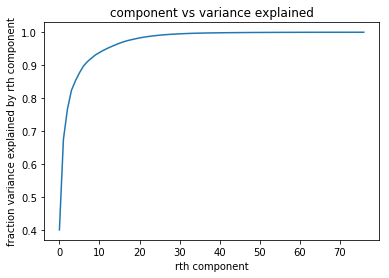

In [8]:
plt.plot(np.cumsum(proteins_pca.explained_variance_ratio_))
plt.xlabel("rth component")
plt.ylabel("fraction variance explained by rth component")
plt.title("component vs variance explained")
print("Needs approximately 6 components to explain 90% of the variance in the data")

(1080, 77)
PC1 vs PC2


C:\Users\Administrator.UWIT-I3HV3TTDVT\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\Administrator.UWIT-I3HV3TTDVT\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index




PC3 vs PC6


PC8 vs PC21


PC2 vs PC9




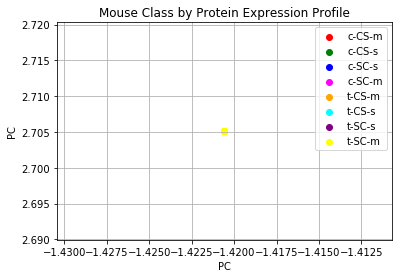

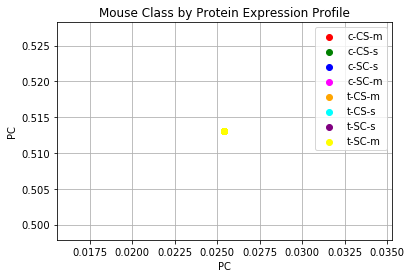

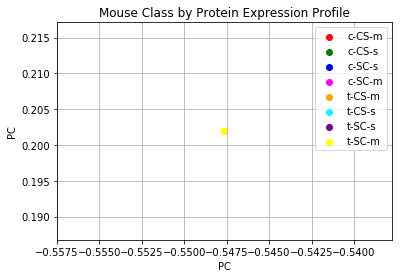

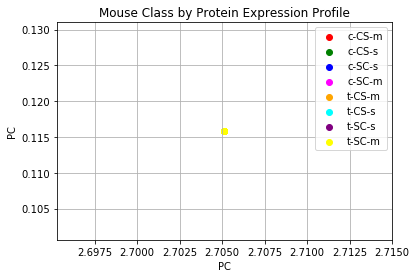

In [9]:
proteins_reduced = proteins_pca.transform(processed_protein)
print(proteins_reduced.shape)

mouse_class_names = ['c-CS-m', 'c-CS-s', 'c-SC-s', 'c-SC-m', 't-CS-m', 't-CS-s', 't-SC-s', 't-SC-m']
colors = ['red', 'green', 'blue', 'magenta', 'orange', 'cyan', 'purple', 'yellow']

def twodim(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for n in np.arange(8):
        ax.scatter(proteins_reduced[mouse_class==n+1, x], proteins_reduced
                [mouse_class==n+1, y], 
                c=colors[n], label=mouse_class_names[n])
    plt.legend(loc='upper right')
    plt.xlabel("PC")
    plt.ylabel("PC")
    plt.title("Mouse Class by Protein Expression Profile")
    plt.grid(True)

    # Graph 1 (PC1 vs PC2):
print("PC1 vs PC2")
twodim(0, 1)
print('\n')
print("PC3 vs PC6")
twodim(2, 5)
print('\n')
print("PC8 vs PC21")
twodim(7, 20)
print('\n')
print("PC2 vs PC9")
twodim(1, 8)
print('\n')



In [10]:
def test_train_id(N, test_frac):
    test_group = np.random.choice(np.arange(0,len(mouse_class)), size=(N*test_frac), replace=False, p=None)
    train_group = np.setdiff1d(np.arange(0, len(mouse_class)), test_group)
    return test_group, train_group
# 1080 = N
test_train_id(1080, 0.3)
test_group, train_group = test_train_id(1080, 0.3)
print(test_group)
print(train_group)



[ 214  357  902  497  479  577  126  543 1004   10  829  338  843  701  485
  323  440  570  805  136  859  124  556  973 1002  919  374   21   55  331
   90  404  521 1046  927  383  229 1000  842  908  797   84  947  550  971
  723  812  793   73  188   15  816  666  969  505  587  361  417  122   86
  488  448  779  847  619  564  738 1035  462  814 1071  399  303  460  257
  649  863  646  954  474  561 1053   63  893  675  720  991  748  270  604
  234  342 1069  737  360  222  580  137  382  540  110  763  593 1011  237
  158   93  324  905  368 1010  778  541  696  393  343  293  352   11  500
  493  339  664  828  955  302  475  166  792  704  281    8  546 1023  380
  916  319  265  499  167  125   35  820  741  336  749  450  739  750  205
  993  802  832  304  984  638  527  426  312  333  161   98    7  903   71
  466  625  446  624  791  349  240  107  614    4  716  332  956  707 1051
  566  948    3  662  358   79  890  939  869 1017  252  437  918   74 1037
  369  427 1

C:\Users\Administrator.UWIT-I3HV3TTDVT\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [11]:
def cross_val_class_accuracy(model, X, y, r, test_frac, reps):
    proteins_pca = PCA()
    
    cvacc = np.array([])
    for i in range(reps):
        train_group, test_group = test_train_id(y.size, test_frac)
        y_train = y[train_group]
        y_test = y[test_group]
        
        X_train = proteins_pca.fit_transform(X[train_group, :])[:, :r]
        X_test = proteins_pca.transform(X[test_group, :])[:, :r]
        
        model.fit(X_train, y_train)
        
        predicted = model.predict(X_test)
        curr_cvacc = sum(predicted == y_test) / len(y_test)
        
        cvacc = np.append(cvacc, curr_cvacc)
    return cvacc

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

testfrac = 0.3
reps = 300

class1 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          processed_protein, mouse_class, 5,
                                          testfrac, reps)
class2 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          processed_protein, mouse_class, 16,
                                          testfrac, reps)
class3 = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=5),
                                       processed_protein, mouse_class, 16,
                                       testfrac, reps)
class4 = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=11),
                                       processed_protein, mouse_class, 16,
                                        testfrac, reps)
class5 = cross_val_class_accuracy(svm.SVC(kernel='linear'),
                                      processed_protein, mouse_class, 16, 
                                      testfrac, reps)
class6 = cross_val_class_accuracy(DecisionTreeClassifier(max_depth=3),
                                       processed_protein, mouse_class, 16,
                                       testfrac, reps)

C:\Users\Administrator.UWIT-I3HV3TTDVT\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Administrator.UWIT-I3HV3TTDVT\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


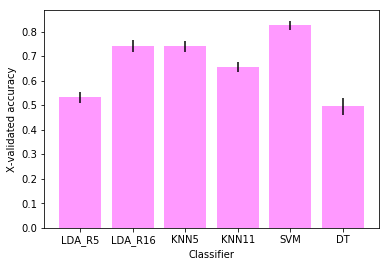

In [19]:
classifiers = ('LDA_R5', 'LDA_R16', 'KNN5', 'KNN11', 'SVM', 'DT')
cvaccs = [class1.mean(), class2.mean(), 
          class3.mean(), class4.mean(),
         class5.mean(), class6.mean()]
err_cvaccs = [class1.std(), class2.std(), 
          class3.std(), class4.std(),
         class5.std(), class6.std()]


plt.bar(range(len(classifiers)), cvaccs, 
        yerr=err_cvaccs,
        align='center', alpha=0.4, color='magenta')
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('X-validated accuracy')
plt.xlabel('Classifier')

C:\Users\Administrator.UWIT-I3HV3TTDVT\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Administrator.UWIT-I3HV3TTDVT\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


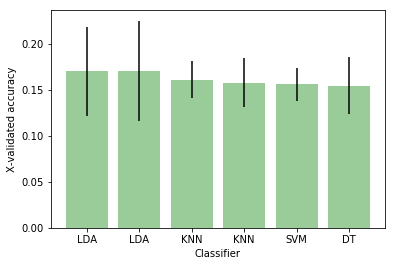

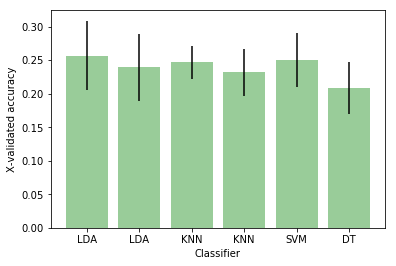

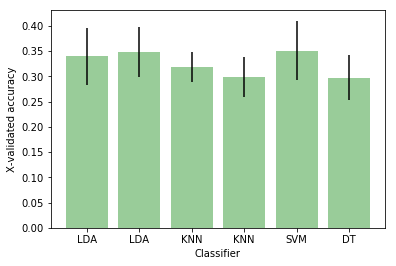

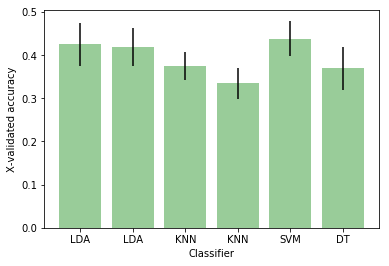

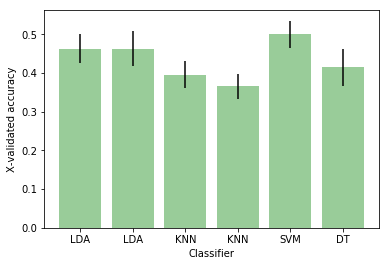

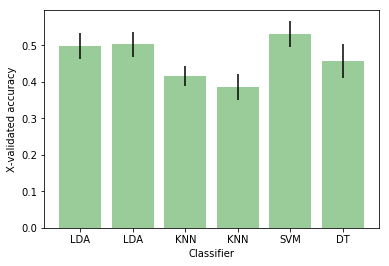

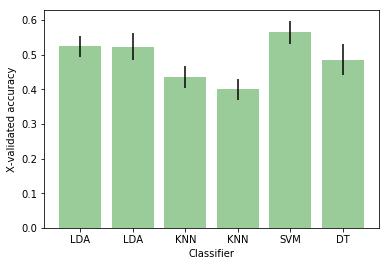

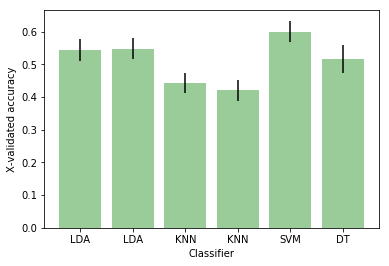

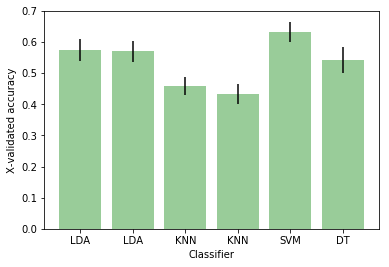

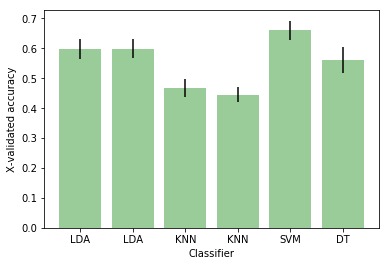

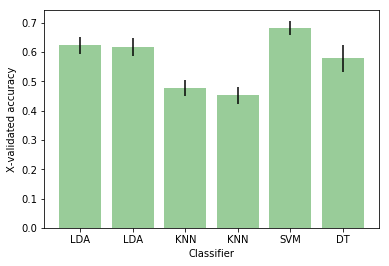

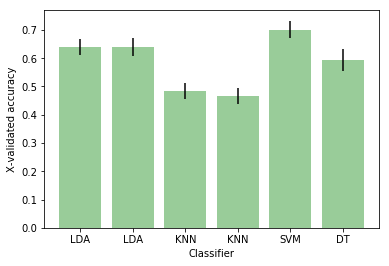

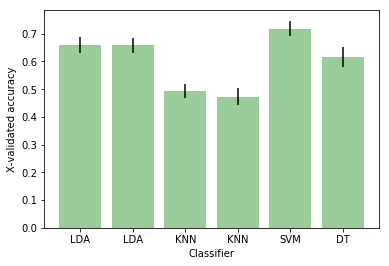

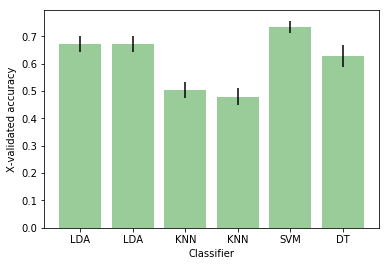

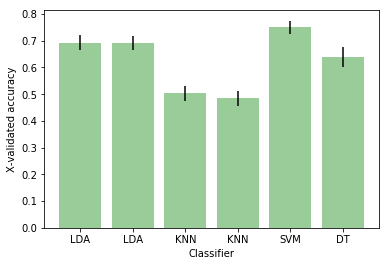

In [14]:
# A for loop for the above set of classifier models and their parameters will be made:
# The coefficients 0.01 and 15 are arbitrarily chosen. 

for i in np.arange(1, 16, 1):
    
    class1 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          processed_protein, mouse_class, i,
                                          i*0.01, i*15)
    class2 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          processed_protein, mouse_class, i,
                                          i*0.01, i*15)
    class3 = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=i),
                                       processed_protein, mouse_class, i,
                                       i*0.01, i*15)
    class4 = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=i+3),
                                       processed_protein, mouse_class, i,
                                        i*0.01, i*15)
    class5 = cross_val_class_accuracy(svm.SVC(kernel='linear'),
                                      processed_protein, mouse_class, i, 
                                      i*0.01, i*15)
    class6 = cross_val_class_accuracy(DecisionTreeClassifier(max_depth=i),
                                       processed_protein, mouse_class, i,
                                       i*0.01, i*15)
    classifiers = ('LDA', 'LDA', 'KNN', 'KNN', 'SVM', 'DT')
    cvaccs = [class1.mean(), class2.mean(), 
          class3.mean(), class4.mean(),
         class5.mean(), class6.mean()]
    err_cvaccs = [class1.std(), class2.std(), 
          class3.std(), class4.std(),
         class5.std(), class6.std()]
    plt.figure(i)

    plt.bar(range(len(classifiers)), cvaccs, 
        yerr=err_cvaccs,
        align='center', alpha=0.4, color='green')
    plt.xticks(range(len(classifiers)), classifiers)
    plt.ylabel('X-validated accuracy')
    plt.xlabel('Classifier')


After performing the above cross-validated comparisons of a groups of classifier models at a time, it was necessary to find the subset of the protein data that was most important for the task of discriminating between the 8 classes of mice.
Thus feature selection was done.


In [15]:
# First, RECURSIVE FEATURE ELIMINATION (RFE) was performed. 
# Source for conceptual understanding: (http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)
# (http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/)


# 11 proteins are chosen, not arbitrarily, but because we wish to see how our results match with the results of the
# research group that had previously performed this experiment.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# A for loop was constructed in order to get all sets of most important proteins in the range 1-11:
# Source for "np.where()": http://stackoverflow.com/questions/27260811/python-find-position-of-element-in-array

for i in np.arange(1, 12, 1):
    model = LogisticRegression()
 
    rfe = RFE(model, i)
    rfe.fit(processed_protein, mouse_class)
    a = rfe.ranking_
    print(rfe.support_)
    print(rfe.ranking_)
    rfe.ranking_.shape
    print(np.where(a == 1))


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
[42  3 56 14 35 53 71 36 63 34  9 49 60 59 48  7 25 12 58 26 45 50 72 23 16
 27 67 55 11 69  8 15  1 38 21 47 29 44 28 31 51 39  4 61 22 65 13 70  2 24
 40 64 54 76 77 57 52 73 41 68 32 66 37 17 74  5 30 62 19 20 75 33 46 10 43
 18  6]
(array([32], dtype=int64),)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False Fals

In [16]:
# Second, the EXTRA TREES CLASSIFIER method was utilized, yielding altogether different "relative importance" values.  
# (http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/)

from sklearn.ensemble import ExtraTreesClassifier

for i in np.arange(1, 12, 1):
    model = ExtraTreesClassifier()
    model.fit(processed_protein, mouse_class)

    print(model.feature_importances_)
    a = model.feature_importances_
    print(np.where(a == a.max()))


[ 0.02685657  0.0179055   0.00621217  0.01064439  0.00696509  0.00754062
  0.00543503  0.02575908  0.00816329  0.01054264  0.01944271  0.01535827
  0.01217374  0.00857016  0.0091044   0.01036144  0.01120164  0.01803894
  0.0100538   0.01308809  0.02056232  0.01027319  0.00610349  0.00649296
  0.00437638  0.0186439   0.00526545  0.00404714  0.00516785  0.00779898
  0.02167686  0.00857462  0.04463667  0.01491922  0.01467937  0.00948878
  0.01535239  0.00531611  0.00657228  0.01667353  0.00914608  0.00908985
  0.02986082  0.01284628  0.00571469  0.01974272  0.03925058  0.00880046
  0.02367119  0.01522333  0.01862265  0.0069222   0.00658059  0.01574661
  0.00316497  0.01085374  0.01727917  0.00796199  0.01014496  0.00809724
  0.01242058  0.00828258  0.00956063  0.00572144  0.00568194  0.02884847
  0.00930404  0.00639741  0.01420075  0.01074439  0.0217785   0.00761797
  0.009527    0.02288613  0.01348424  0.01521018  0.01957457]
(array([32], dtype=int64),)
[ 0.02743135  0.02077518  0.009629

It would appear that, after performing the RFE, the RFE has provided us with a set of "most important" proteins. The extra trees classifier has then allowed us to find the most important protein of that set of 11 "most important"/"most discriminant" proteins. That protein appears to occur at index 32 in the processed_protein array. 

After ranking the proteins in terms of their "relative importance", we desired to see if the protein expression data itself would cluster into groups. For this purpose, a k-means clustering method is shown below:

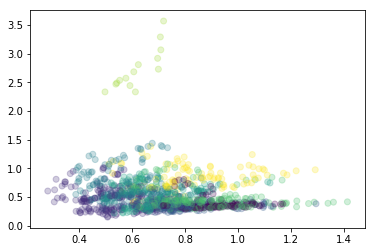

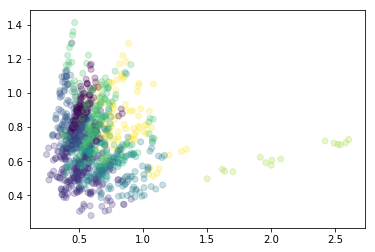

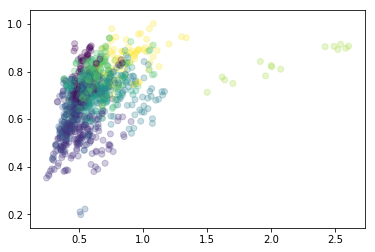

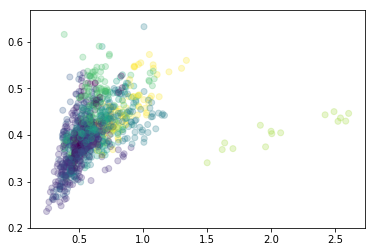

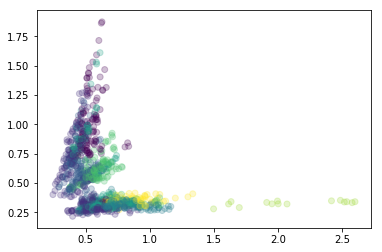

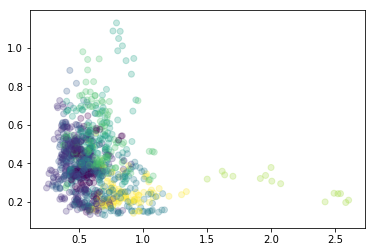

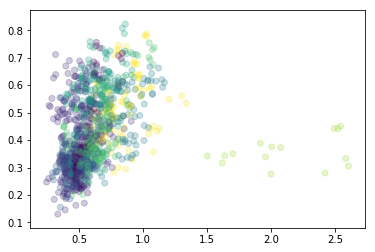

In [17]:
# K-means clustering: 

# Most important columns (proteins) in processed_protein: 1, 10, 15, 28, 30, 32, 42, 48, 65, 73, 76
# This bit of code was sourced from the Week 9 Monday Lecture on clustering.

from sklearn.cluster import KMeans

# It is assumed/hoped that there are 8 clusters in the protein expression data that allow for differentiation between the 8 classes. 
kmeans = KMeans(n_clusters = 8)
kmeans.fit(processed_protein)

group = kmeans.labels_

def kmeans(h, i, j):
    plt.figure(h)
    plt.scatter(processed_protein[:, i], processed_protein[:, j], c=group, alpha=0.25)
kmeans(1, 15, 10)
kmeans(2, 1, 15)
kmeans(3, 1, 28)
kmeans(4, 1, 30)
kmeans(5, 1, 32)
kmeans(6, 1, 42)
kmeans(7, 1, 48)
